# Workflow

En esta práctica vamos a aplicar lo aprendido en esta asignatura para crear un flujo que automatice la descarga, análisis y publicación de los datos utilizando distintas herramientas como Zenodo, github y librerías de python para el análisis de datos

### Librerías necesarias para la práctica

```python
import xml.etree.ElementTree as ET
import requests
import json
import zipfile
```

### Elementos necesarios
* Al menos un fichero CSV
* Un script de análisis de datos en CSV (Publicado en Github)


## Nombres:
### Ezequiel Cimadevilla Alvarez
### Jose Ney Gandica Cardenas

In [1]:
import xml.etree.ElementTree as ET
import requests
import json
from IPython.core.display import display, HTML
##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import itertools as it

# Publicación de datos iniciales

Utilizando Zenodo, de forma manual, publicar los datos que se vayan a utilizar.

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>Utilizar Communities para localizar más facilmente los datos</p>
</div>




[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.2541765.svg)](https://doi.org/10.5281/zenodo.2541765)



# Publicación de script de Análisis

En Github + Zenodo



[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.2541794.svg)](https://doi.org/10.5281/zenodo.2541794)



# Descarga de datos

Desde Zenodo, utilizando los métodos conocidos (OAI-PMH, API)

Pista: url+'?verb=ListRecords&set=nombre_set

In [2]:
oai = requests.get('https://zenodo.org/oai2d?verb=GetRecord&metadataPrefix=datacite3&identifier=oai:zenodo.org:2541765')
oaiTree = ET.fromstring(oai.text)
for i in oaiTree.iter():
        print(i.tag, '+', i.text)

{http://www.openarchives.org/OAI/2.0/}OAI-PMH + 
  
{http://www.openarchives.org/OAI/2.0/}responseDate + 2019-01-16T17:49:05Z
{http://www.openarchives.org/OAI/2.0/}request + https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}GetRecord + 
    
{http://www.openarchives.org/OAI/2.0/}record + 
      
{http://www.openarchives.org/OAI/2.0/}header + 
        
{http://www.openarchives.org/OAI/2.0/}identifier + oai:zenodo.org:2541765
{http://www.openarchives.org/OAI/2.0/}datestamp + 2019-01-16T15:31:14Z
{http://www.openarchives.org/OAI/2.0/}metadata + 
        
{http://datacite.org/schema/kernel-3}resource + 
          
{http://datacite.org/schema/kernel-3}identifier + 10.5281/zenodo.2541765
{http://datacite.org/schema/kernel-3}creators + 
            
{http://datacite.org/schema/kernel-3}creator + 
              
{http://datacite.org/schema/kernel-3}creatorName + Ezequiel Cimadevilla
{http://datacite.org/schema/kernel-3}creator + 
              
{http://datacite.org/schema/kernel-3

In [3]:
url = "https://doi.org/10.5281/zenodo.2541765" #DOI solver URL
headers = {'Accept': 'application/vnd.citationstyles.csl+json;q=1.0'} #Type of response accpeted
r = requests.get(url, headers=headers) #POST with headers

In [4]:
data = json.loads(r.text)
data

{'type': 'dataset',
 'id': 'https://doi.org/10.5281/zenodo.2541765',
 'author': [{'family': 'Cimadevilla', 'given': 'Ezequiel'},
  {'family': 'Gandica', 'given': 'Jose'}],
 'issued': {'date-parts': [[2019, 1, 16]]},
 'abstract': 'Práctica para Ciclo de Vida de los Datos',
 'DOI': '10.5281/zenodo.2541765',
 'publisher': 'Zenodo',
 'title': 'Viajeros, pernoctaciones y estancia media segun procedencia',
 'URL': 'https://zenodo.org/record/2541765'}

In [5]:
for elem in data:
    if elem == 'URL':
        pdf = data[elem]
pdf

'https://zenodo.org/record/2541765'

In [6]:
url = pdf #DOI solver URL
headers = {'accept': 'application/json'}
r = requests.get('https://zenodo.org/api/records/2541765',headers)

In [7]:
data = json.loads(r.text)
data

{'conceptdoi': '10.5281/zenodo.2541764',
 'conceptrecid': '2541764',
 'created': '2019-01-16T15:24:04.427085+00:00',
 'doi': '10.5281/zenodo.2541765',
 'files': [{'bucket': 'f53468f8-2fa0-4e83-875e-cfebde62099b',
   'checksum': 'md5:4c4962732f5df9c505379df8d7e8b843',
   'key': 'Viajeros, pernoctaciones y estancia media según procedencia y zonas-1.csv',
   'links': {'self': 'https://zenodo.org/api/files/f53468f8-2fa0-4e83-875e-cfebde62099b/Viajeros%2C%20pernoctaciones%20y%20estancia%20media%20seg%C3%BAn%20procedencia%20y%20zonas-1.csv'},
   'size': 421060,
   'type': 'csv'}],
 'id': 2541765,
 'links': {'badge': 'https://zenodo.org/badge/doi/10.5281/zenodo.2541765.svg',
  'bucket': 'https://zenodo.org/api/files/f53468f8-2fa0-4e83-875e-cfebde62099b',
  'conceptbadge': 'https://zenodo.org/badge/doi/10.5281/zenodo.2541764.svg',
  'conceptdoi': 'https://doi.org/10.5281/zenodo.2541764',
  'doi': 'https://doi.org/10.5281/zenodo.2541765',
  'html': 'https://zenodo.org/record/2541765',
  'latest

In [8]:
for elem in data:
    if elem == 'files':
        csv = data[elem][0]['links']['self']

In [9]:
oai = requests.get(csv)

with open('data_1.csv', 'wb') as f:
    f.write(oai.content)

# Descarga de código

Desde Zenodo, utilizando los métodos conocidos (OAI-PMH, API)

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>Zenodo guarda un zip con el código</p>
</div>

In [10]:
url = pdf #DOI solver URL
headers = {'accept': 'application/json'}
r = requests.get('https://zenodo.org/api/records/2542007',headers)

In [11]:
data = json.loads(r.text)
data

{'conceptdoi': '10.5281/zenodo.2541993',
 'conceptrecid': '2541993',
 'created': '2019-01-16T17:47:28.238160+00:00',
 'doi': '10.5281/zenodo.2542007',
 'files': [{'bucket': '1ab20d68-d83c-464f-a8d9-88270b4cab9f',
   'checksum': 'md5:e82d80ad112ec756e547298915dc6bf9',
   'key': 'zequihg50/workflows-Fio.zip',
   'links': {'self': 'https://zenodo.org/api/files/1ab20d68-d83c-464f-a8d9-88270b4cab9f/zequihg50/workflows-Fio.zip'},
   'size': 534,
   'type': 'zip'}],
 'id': 2542007,
 'links': {'badge': 'https://zenodo.org/badge/doi/10.5281/zenodo.2542007.svg',
  'bucket': 'https://zenodo.org/api/files/1ab20d68-d83c-464f-a8d9-88270b4cab9f',
  'conceptbadge': 'https://zenodo.org/badge/doi/10.5281/zenodo.2541993.svg',
  'conceptdoi': 'https://doi.org/10.5281/zenodo.2541993',
  'doi': 'https://doi.org/10.5281/zenodo.2542007',
  'html': 'https://zenodo.org/record/2542007',
  'latest': 'https://zenodo.org/api/records/2542007',
  'latest_html': 'https://zenodo.org/record/2542007',
  'self': 'https://

In [12]:
for elem in data:
    if elem == 'files':
        zip = data[elem][0]['links']['self']

In [13]:
oai = requests.get(zip)

with open('codigo.zip', 'wb') as f:
    f.write(oai.content)

In [14]:
import zipfile

In [15]:
zip_ref = zipfile.ZipFile('codigo.zip', 'r')
zip_ref.extractall('.')
zip_ref.close()

# Análisis de los datos

Producir fichero: Otro CSV, imagen, etc

In [16]:
df1 = pd.read_csv('data_1.csv', index_col=0)
df1.head(2)

,Cantabria - Total - Viajeros,Cantabria - Total - Pernoctaciones,Cantabria - Total - Estancia media,Cantabria - Españoles - Viajeros,Cantabria - Españoles - Pernoctaciones,Cantabria - Españoles - Estancia media,Cantabria - Andalucía - Viajeros,Cantabria - Andalucía - Pernoctaciones,Cantabria - Andalucía - Estancia media,Cantabria - Asturias (Principado de) - Viajeros,...,Trasmiera - Resto Unión Europea - Estancia media,Trasmiera - Resto Europa - Viajeros,Trasmiera - Resto Europa - Pernoctaciones,Trasmiera - Resto Europa - Estancia media,Trasmiera - América - Viajeros,Trasmiera - América - Pernoctaciones,Trasmiera - América - Estancia media,Trasmiera - Resto del mundo - Viajeros,Trasmiera - Resto del mundo - Pernoctaciones,Trasmiera - Resto del mundo - Estancia media
2006-Enero,37834,65565,1.73,34260,58861,1.72,817,1829,2.24,2872,...,NaN,23.0,32.0,1.41,9.0,23.0,2.65,10.0,10.0,1.02
2006-Febrero,46180,90758,1.97,41748,82139,1.97,1327,2638,1.99,3964,...,NaN,NaN,NaN,NaN,10.0,22.0,2.09,NaN,NaN,NaN


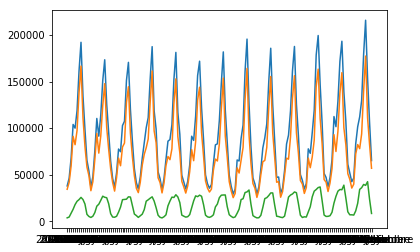

In [20]:
%run zequihg50-workflows-de6cfce/prueba.py

# Publicación de los Datos

Utilizando la API de Zenodo

In [29]:
parametros = {'access_token': 'CO3sbx6ldTiBr0q1GIdUCt3cAReMzEjp0zToHpQsYlYW7MDC7ptTVDWunhJb'}

#### Let’s try again (replace ACCESS_TOKEN with your newly created personal access token):

In [24]:
r = requests.get('https://zenodo.org/api/deposit/depositions',
                 params= parametros)
r.status_code
r.json()

[{'conceptdoi': '10.5281/zenodo.2541974',
  'conceptrecid': '2541974',
  'created': '2019-01-16T17:14:59.644537',
  'doi': '10.5281/zenodo.2541975',
  'doi_url': 'https://doi.org/10.5281/zenodo.2541975',
  'files': [{'checksum': 'd8fe046811f007becf7d6358433d81c6',
    'filename': 'figura_1.png',
    'filesize': 44952,
    'id': 'bd59a4b7-7d39-4312-91b0-ffb6001d65e0',
    'links': {'download': 'https://zenodo.org/api/files/11dccdd9-6627-4169-a090-3be05b4fd1a7/figura_1.png',
     'self': 'https://zenodo.org/api/deposit/depositions/1435644/files/bd59a4b7-7d39-4312-91b0-ffb6001d65e0'}}],
  'id': 2541975,
  'links': {'badge': 'https://zenodo.org/badge/doi/10.5281/zenodo.2541975.svg',
   'bucket': 'https://zenodo.org/api/files/0f2c8a67-aab1-4f63-ad64-7e38e8a022c8',
   'conceptbadge': 'https://zenodo.org/badge/doi/10.5281/zenodo.2541974.svg',
   'conceptdoi': 'https://doi.org/10.5281/zenodo.2541974',
   'discard': 'https://zenodo.org/api/deposit/depositions/2541975/actions/discard',
   'doi':

#### Next, let’s create a new empty upload:

In [25]:
headers = {"Content-Type": "application/json"}
r = requests.post('https://zenodo.org/api/deposit/depositions',
                   params=parametros, json={},
                   headers=headers)
r.status_code
r.json()

{'conceptrecid': '2542013',
 'created': '2019-01-16T17:50:41.654375+00:00',
 'files': [],
 'id': 2542014,
 'links': {'bucket': 'https://zenodo.org/api/files/4c1c3936-8ee8-4d47-b7e3-1e5c151cea73',
  'discard': 'https://zenodo.org/api/deposit/depositions/2542014/actions/discard',
  'edit': 'https://zenodo.org/api/deposit/depositions/2542014/actions/edit',
  'files': 'https://zenodo.org/api/deposit/depositions/2542014/files',
  'html': 'https://zenodo.org/deposit/2542014',
  'latest_draft': 'https://zenodo.org/api/deposit/depositions/2542014',
  'latest_draft_html': 'https://zenodo.org/deposit/depositions/2542014',
  'publish': 'https://zenodo.org/api/deposit/depositions/2542014/actions/publish',
  'self': 'https://zenodo.org/api/deposit/depositions/2542014'},
 'metadata': {'prereserve_doi': {'doi': '10.5281/zenodo.2542014',
   'recid': 2542014}},
 'modified': '2019-01-16T17:50:41.654382+00:00',
 'owner': 58439,
 'record_id': 2542014,
 'state': 'unsubmitted',
 'submitted': False,
 'title'

#### Now, let’s upload a new file:

In [26]:
# Get the deposition id from the previous response
deposition_id = r.json()['id']
data = {'filename': 'figura_1.png'}
files = {'file': open('figura_1.png', 'rb')}
r = requests.post('https://zenodo.org/api/deposit/depositions/%s/files' % deposition_id,
                   params=parametros, data=data,
                   files=files)
r.status_code
r.json()

{'checksum': 'd8fe046811f007becf7d6358433d81c6',
 'filename': 'figura_1.png',
 'filesize': 44952,
 'id': '3143d54b-c034-43c9-8a4e-5305d1419747',
 'links': {'download': 'https://zenodo.org/api/files/4c1c3936-8ee8-4d47-b7e3-1e5c151cea73/figura_1.png',
  'self': 'https://zenodo.org/api/deposit/depositions/2542014/files/3143d54b-c034-43c9-8a4e-5305d1419747'}}

#### Last thing missing, is just to add some metadata:

In [27]:
data = {
     'metadata': {
         'title': 'My first upload',
         'upload_type': 'poster',
         'description': 'This is my first upload',
         'creators': [{'name': 'Ezequiel, Jose Ney',
                       'affiliation': 'datalyfe_test_16_01_2019_unican'}]
     }
}
r = requests.put('https://zenodo.org/api/deposit/depositions/%s' % deposition_id,
                  params=parametros, data=json.dumps(data),
                  headers=headers)
r.status_code

200

#### And we’re ready to publish:

In [28]:
r = requests.post('https://zenodo.org/api/deposit/depositions/%s/actions/publish' % deposition_id,
                      params=parametros )
r.status_code

202

¿Puedes replicar ese workflow en un sólo bloque con otros datos?